In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

sns.set_theme(style="whitegrid", palette="viridis", context="notebook")

# Load the data
df = pd.read_csv('../seeds/acceptance_report_raw.csv')

In [33]:
df.head()

,external_ref,status,source,ref,date_time,state,cvv_provided,amount,country,currency,rates
0,nCyEIIGaP5QQ2Wqb-_Rt8,True,GLOBALPAY,evt_1ESgcCOV7fY1ChY1MkZizZt,2019-01-01T00:00:00.000Z,DECLINED,False,1020.46,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
1,ptNiI9B7NNpK7VsMZx6zZ,True,GLOBALPAY,evt_1EBMGCEjEtianKMJaZXOx1y,2019-01-01T04:48:00.000Z,ACCEPTED,False,1582.57,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
2,1GS5BDKBnauCt-3nHPs6x,True,GLOBALPAY,evt_1EOALu0AZqEhZBn9ub_nbcE,2019-01-01T09:36:00.000Z,DECLINED,False,1653.07,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
3,Y_oecYz8GjBDaxmMqkkLQ,True,GLOBALPAY,evt_1ESHsWyaSPqE1mrmJ2B6rvs,2019-01-01T14:24:00.000Z,ACCEPTED,False,2228.17,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
4,LlEs1TnKVa2xX6PH9Zsz0,True,GLOBALPAY,evt_1EjzPk13qLzmvDR_4hXuMMw,2019-01-01T19:12:00.000Z,ACCEPTED,False,2589.92,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."


In [34]:
print(f'Min Trasnsaction Date: {df['date_time'].min()}')
print(f'Max Trasnsaction Date: {df['date_time'].max()}')
print(f'DF total rows: {df.shape[0]}')
print(f'DF total columns: {df.shape[1]}')

Min Trasnsaction Date: 2019-01-01T00:00:00.000Z
Max Trasnsaction Date: 2019-06-30T19:12:00.000Z
DF total rows: 5430
DF total columns: 11


/var/folders/dk/qy1z7_41257bjbrp99_83xs00000gn/T/ipykernel_71048/3998332534.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis',
/var/folders/dk/qy1z7_41257bjbrp99_83xs00000gn/T/ipykernel_71048/3998332534.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis',
/var/folders/dk/qy1z7_41257bjbrp99_83xs00000gn/T/ipykernel_71048/3998332534.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis',
/var/folders/dk/

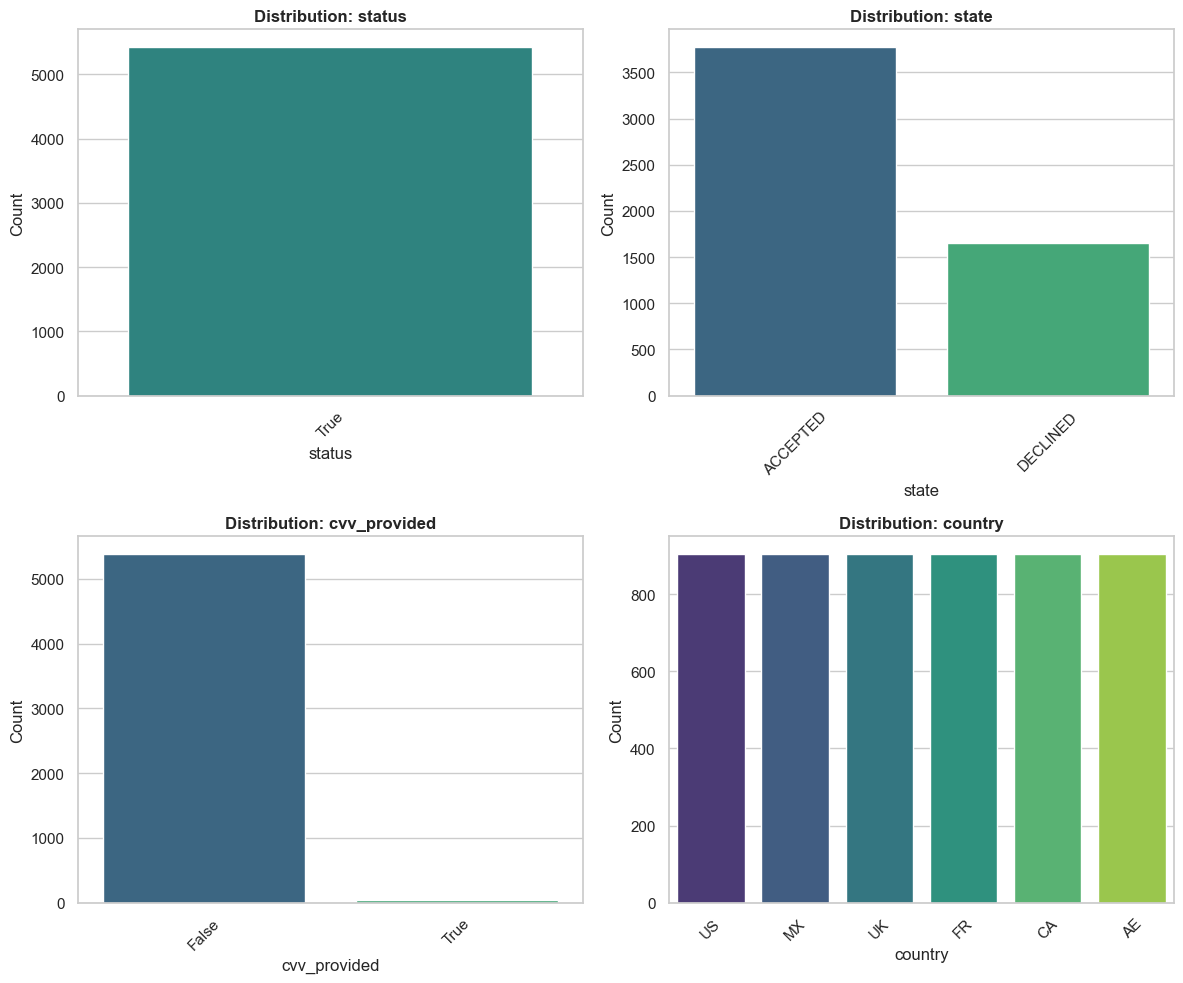

In [35]:
cols_to_check = ['status', 'state', 'cvv_provided', 'country']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()  # Flatten to easily loop through them

for i, col in enumerate(cols_to_check):
    sns.countplot(data=df, x=col, ax=axes[i], palette='viridis', 
                  order=df[col].value_counts().index)
    
    axes[i].set_title(f'Distribution: {col}', fontweight='bold')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../analyses/eda_graphics/distribution_grid.png')
plt.show()

In [36]:
# Total rows for overview
print(f"Total records: {df.shape[0]}")

# Check for nulls
print(df.isnull().sum())

# Check for dups (external references look like they should be unique)
print(f"Duplicate external refs: {df['external_ref'].duplicated().sum()}")
print(f"Duplicate refs: {df['ref'].duplicated().sum()}")


# Test potential json errors
# Does every row have a valid JSON string in 'rates'?
def is_valid_json(x):
    try:
        json.loads(x.replace("'", '"')) # Handling potential single quote issues
        return True
    except:
        return False

invalid_json_count = df[~df['rates'].apply(is_valid_json)].shape[0]
print(f"Rows with broken JSON rates: {invalid_json_count}")

Total records: 5430
external_ref    0
status          0
source          0
ref             0
date_time       0
state           0
cvv_provided    0
amount          0
country         0
currency        0
rates           0
dtype: int64
Duplicate external refs: 0
Duplicate refs: 0
Rows with broken JSON rates: 0


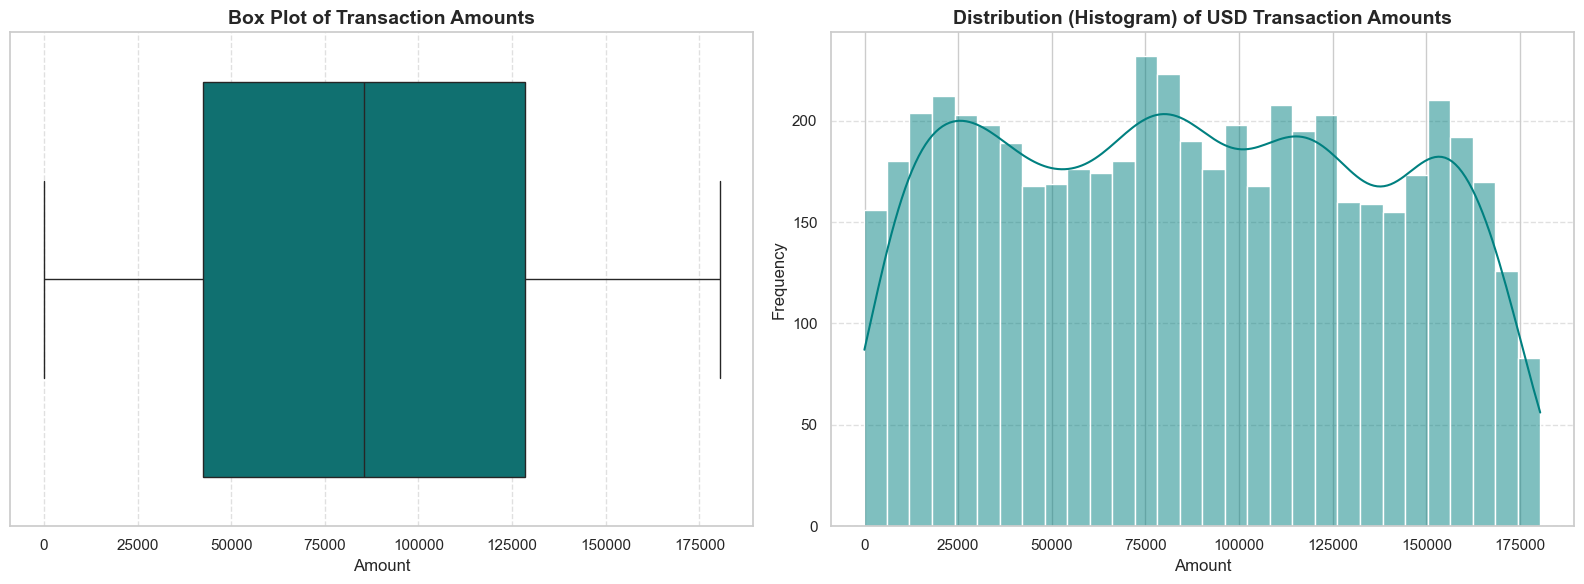

In [37]:
# 3. Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Box Plot (Left) ---
sns.boxplot(x=df['amount'], ax=axes[0], color='teal')
axes[0].set_title('Box Plot of Transaction Amounts', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Amount', fontsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.6)

# --- Plot 2: Histogram/KDE (Right) ---
sns.histplot(df['amount'], kde=True, ax=axes[1], color='teal', bins=30)
axes[1].set_title('Distribution (Histogram) of USD Transaction Amounts', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Amount', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('../analyses/eda_graphics/amount_field_distributions.png')
plt.show()

In [38]:
from IPython.display import display

cols_to_check = ['status', 'state', 'cvv_provided', 'country', 'country']

for col in cols_to_check:
    print(f"Distribution for: {col}")
    display(df[col].value_counts().to_frame())

Distribution for: status


,count
status,
True,5430


Distribution for: state


,count
state,
ACCEPTED,3777
DECLINED,1653


Distribution for: cvv_provided


,count
cvv_provided,
False,5390
True,40


Distribution for: country


,count
country,
US,905
MX,905
UK,905
FR,905
CA,905
AE,905


Distribution for: country


,count
country,
US,905
MX,905
UK,905
FR,905
CA,905
AE,905
